In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import levene
import scipy.stats as stats
import scipy.cluster.hierarchy as sch
%matplotlib notebook

In [16]:
data1 = pd.read_excel("C题数据.xlsx", "datat1").drop(labels=50).drop(labels=["组号", "编号"], axis=1)
data2 = pd.read_excel("C题数据.xlsx", "data2").drop(labels=[0, 1, 2, 8]).drop(labels=["Unnamed: 0", "Unnamed: 1"], axis=1)
data2.index = [20, 25, 30, 35, 40]
data3 = pd.read_excel("C题数据.xlsx", "data3")
data1

,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,插层率（%）
0,1.715,93.52,77.84,8.130,4.967,777.10,NaN
1,2.810,96.28,83.20,7.533,19.967,1019.67,36.44
2,1.830,93.93,86.23,10.470,1.933,795.57,NaN
3,2.910,96.41,86.65,7.200,24.967,968.63,24.74
4,1.890,94.12,82.12,11.870,4.300,564.93,NaN
5,3.425,96.95,94.33,10.133,34.600,643.40,31.45
6,2.095,94.70,83.01,13.900,11.767,474.50,NaN
7,3.400,96.93,82.88,10.600,33.900,603.17,19.37
8,2.235,95.03,86.04,19.230,20.767,347.23,NaN
9,3.845,97.30,75.97,15.700,54.500,405.83,31.19


In [17]:
# 第一问
yv = data1.values
yi = np.delete(yv[[i for i in range(0, 50, 2)]], -1, axis=1)
yip = np.delete(yv[[i for i in range(1, 50, 2)]], -1, axis=1)
e = (yip - yi) / yi
e = np.insert(e, 6, data1["插层率（%）"].values[~np.isnan(data1["插层率（%）"].values)],axis=1)
dfe = pd.DataFrame(e, columns=data1.columns)
dfe.index = [i+1 for i in dfe.index]
dfe.index.name = "组别"
dfe.columns = ["厚度相对变化量", "孔隙率相对变化量", "压缩回弹性率相对变化量", "过滤阻力相对变化量", "过滤效率相对变化量", "透气性相对变化量", "插层率（%）"]
dfe.to_excel("相对变化量表.xlsx")
dfe

<IPython.core.display.Javascript object>


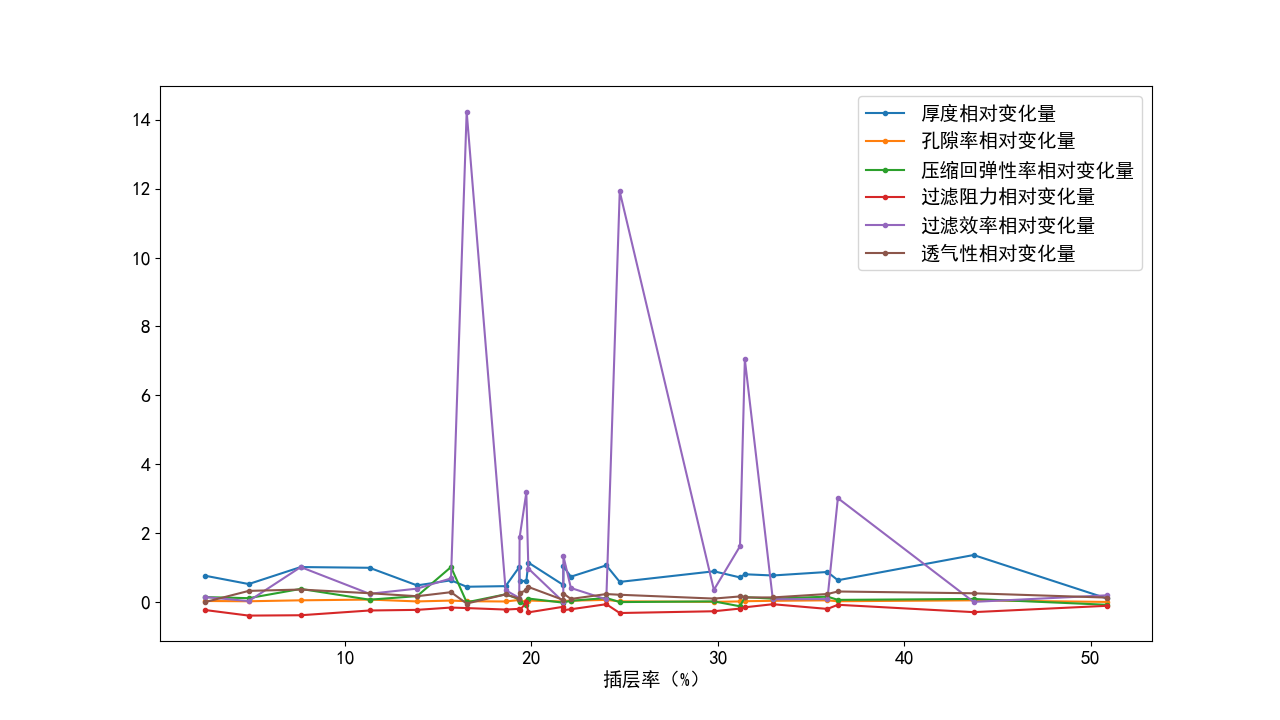

In [10]:
plt.rc('font', size=14)
plt.rc('font', family="SimHei")
plt.rc('axes', unicode_minus=False)
plt.rc('figure',figsize=(12.8, 7.2))
plt.subplots_adjust(wspace=0.4, hspace=0.5)
i = 231
for tar in dfe.columns[:-1]:
    plt.subplot(i)
    plt.bar(np.arange(1, 26), dfe[tar].values)
    plt.xticks(np.array([1, 5, 10, 15, 20 ,25]))
    plt.xlabel("组别")
    plt.title(tar)
    i += 1
plt.savefig("./相对变化量直方图.png")
#plt.show()
plt.clf()


In [19]:
with open("第一次方差分析结果.txt","w") as f:
    for tar in data1.columns[:-1]:
        x = np.tile(np.array([0, 1]), 25)
        y = data1[tar].values
        stat, p = levene(y[[i for i in range(0, 25, 2)]],
                         y[[i for i in range(1, 25, 2)]])
        if p > 0.05:
            f.write("对{0}进行检验得到的显著性为{1}，认为本次方差分析是齐的，可以进行方差分析\n".format(tar, p.round(4)))
            d = {'x': x, 'y': y}
            model1 = sm.formula.ols("y ~ C(x)", data=d).fit()
            s = sm.stats.anova_lm(model1)
            f.write(str(s)+'\n')
            f.write('='*80+'\n')


In [22]:
cs = sch.linkage([[i] for i in dfe["插层率（%）"].values], method='complete')
sch.dendrogram(cs, labels=np.arange(1, 26))
plt.yticks([])
plt.axhline(40, 0, 1, color='r')
plt.xlabel("组别")
plt.savefig("聚类图.png")
plt.show()
plt.clf()

(array([10, 12, 14], dtype=int64),)

In [21]:
x = sch.fcluster(cs, t=2, criterion='maxclust')
w1_arg = np.where(x == 1)
w2_arg = np.where(x == 2)


In [34]:
with open("第二次方差分析结果.txt", "w") as f:
    i = 0
    for tar in dfe.columns[:-1]:
        y = dfe[tar].values
        stat, p = levene(y[w1_arg],
                         y[w2_arg])
        if p > 0.05:
            f.write(
                "对{0}进行检验得到的显著性为{1}，认为本次方差分析是齐的，可以进行方差分析\n".format(
                    tar, p.round(4)))
            d = {'x': x, 'y': y}
            model1 = sm.formula.ols("y ~ C(x)", data=d).fit()
            s = sm.stats.anova_lm(model1)
            f.write(str(s) + '\n')
            f.write('=' * 80 + '\n')
            plt.plot(es[:, -1].flat, es[:, i], marker='.', label=tar)
            i += 1
        else:
            f.write("对{0}进行检验得到的显著性为{1}，未通过检验\n".format(tar, p.round(4)))
    plt.xlabel("插层率（%）")
    plt.ylabel("变化比例")
    plt.legend()
    plt.savefig("相对变化量随插层率变化图.png")
    plt.show()
    plt.clf()


<IPython.core.display.Javascript object>

In [36]:
with open("第一题相关系数分析.txt", "w") as f:
    for tar in dfe.columns[:-1]:
        y = dfe[tar].values
        coef = np.corrcoef(y, dfe["插层率（%）"].values)[0, 1]
        f.write(
            "{0}与插层率间的相关系数为{1}\n".format(
                tar, coef.round(4)))


In [41]:
raw_data3 = data3.values
prob2_data = (raw_data3[[i for i in range(0, 75, 3)], : 5] + raw_data3[[
    i for i in range(1, 75, 3)], : 5] + raw_data3[[i for i in range(2, 75, 3)], : 5]) / 3 
prob2_df = pd.DataFrame(prob2_data, columns=data3.columns[: 5])
prob2_df


,接收距离(cm),热风速度(r/min),厚度mm,孔隙率（%）,压缩回弹性率（%）
0,40.0,800.0,2.759180,96.016300,84.793750
1,40.0,900.0,3.049211,96.660930,85.320390
2,40.0,1000.0,3.278972,96.909733,85.556427
3,40.0,1100.0,3.422445,96.757311,85.033277
4,40.0,1200.0,3.516909,96.721242,83.668346
5,35.0,800.0,2.402686,95.959635,86.719183
6,35.0,900.0,2.696144,96.405324,87.261357
7,35.0,1000.0,2.921548,96.516558,87.297681
8,35.0,1100.0,3.065953,96.391245,87.083865
9,35.0,1200.0,3.158709,96.691105,85.713582


In [49]:
with open("第二题线性回归模型.txt", "w") as f:
    f.write("x1:接收距离(cm), x2:热风速度(r/min)\ny1:厚度mm, y2:孔隙率（%）, y3:压缩回弹性率（%）")
    x1 = prob2_df['接收距离(cm)'].values
    x2 = prob2_df['热风速度(r/min)'].values
    y1 = prob2_df['厚度mm'].values
    y2 = prob2_df['孔隙率（%）'].values
    y3 = prob2_df['压缩回弹性率（%）'].values
    prob2_y1l = sm.formula.ols(
        'y ~ x1 + x2', {'x1': x1, 'x2': x2, 'y': y1}).fit()
    prob2_y2l = sm.formula.ols(
        'y ~ x1 + x2', {'x1': x1, 'x2': x2, 'y': y2}).fit()
    prob2_y3l = sm.formula.ols(
        'y ~ x1 + x2', {'x1': x1, 'x2': x2, 'y': y3}).fit()
    f.write("对于y1建立的模型为结果为\n")
    f.write(str(prob2_y1l.summary()) + '\n')
    f.write("其残差平方和为"+str(prob2_y1l.mse_resid))
    f.write("对于y2建立的模型为结果为\n")
    f.write(str(prob2_y2l.summary()) + '\n')
    f.write("其残差平方和为"+str(prob2_y2l.mse_resid))
    f.write("对于y3建立的模型为结果为\n")
    f.write(str(prob2_y3l.summary()) + '\n')
    f.write("其残差平方和为"+str(prob2_y3l.mse_resid))
